# Trabajo 4: Redes Neuronales

### Integrantes:

- Simon Londono Aguirre 



### Instrucciones:

- Modifique el nombre de este archivo con los nombres de los integrantes.
- Agrege los nombres y documentos de identidad de los integrantes del equipo en la sección de arriba.
- Resuelva la situación planteada cumpliendo los criterios de aceptación. Estos criterios son los que determinarán su calificación.
- Entregue:
    - Este notebook con el desarrollo de su ejercicio
    - El modelo ya entrenado en **formato HDF5** (archivo de extensión **`.h5`**). Asignele un nombre aprompiado que contenga las iniciales de los integrantes.

# Problema: Clasificación de Imágenes de Aves


Conjunto de datos de 525 especies de aves. 84635 imágenes de entrenamiento, 2625 imágenes de prueba (5 imágenes por especie) y 2625 imágenes de validación (5 imágenes por especie). Este es un conjunto de datos de muy alta calidad en el que solo hay un ave en cada imagen y el ave generalmente ocupa al menos el 50% de los píxeles en la imagen.

Se desea realizar una red neuronal que permita clasificar estas 525 especies de aves y para ello, utilice la técnica de Transferencia de Aprendizaje (Transfer Learning) para utilizar una red previamente entrenada y desarrollar un nuevo modelo.

Descargue las imágenes en [este link](https://udemedellin-my.sharepoint.com/:u:/g/personal/jjospina_udemedellin_edu_co/ERSosEmX8jFEnr1Y-C9-AYsBArLCpW9ItsXpWWC5f_RWpg?e=dPHsix).
        
Las categorías de cada imagen se encuentran según la carpeta donde estén alojadas.

## Ponderación de la calificación

- **(50%)** Entrenamiento del modelo:
    - Elija un modelo de red neuronal pre-entrenado para utilizarlo en la solución del problema. Algunas fuentes para buscar modelos son:
        - Aplicaciones ofrecidas por [Keras](https://keras.io/api/applications/)
        - [TensorFlow Hub](https://tfhub.dev/)
        - [Nvidia NGC](https://catalog.ngc.nvidia.com/?filters=&orderBy=weightPopularASC&query=)
    - Congele el modelo base
    - Agregue nuevas capas a su modelo para adaptarlo al problema
    - Haga un proceso de ***Data Augmentation***
    - Compile y entrene su modelo
    - Realice ***Fine-Tuning***
    - Calcule la precisión de su modelo   
- **(50%)** Validación del modelo. Se han reservado 2625 imágenes para probar que tan bueno es el modelo. **NO DEBE ENTRENAR SU MODELO CON ESTAS IMÁGENES**. Harán el papel de "nuevas imágenes" que ingresan a un modelo ya entrenado. Con estas imágenes se calculará la precisión de la red. El score mínimo será del 60%. La nota de este item será de acuerdo al ranking de los mejores modelos del curso.

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False) 
datagen_valid = ImageDataGenerator(samplewise_center=True)

In [3]:
base_model=ResNet50(include_top=False, weights="imagenet", input_tensor=None, input_shape=(224, 224, 3), pooling=None)

In [4]:
base_model.trainable = False

In [5]:
input_shape = (1, 224 , 224, 3)
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Flatten, Dropout)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(525, activation='softmax')(x)
x = tf.random.normal(input_shape)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(525, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 525)               1075725   
Total params: 24,663,437
Trainable params: 1,075,725
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
train = datagen_train.flow_from_directory("desktop/birds/train/", target_size=(224, 224), color_mode="rgb",
class_mode="categorical", batch_size=32,
)

test = datagen_valid.flow_from_directory("desktop/birds/test/", target_size=(224, 224), color_mode="rgb",
class_mode="categorical", batch_size=32)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


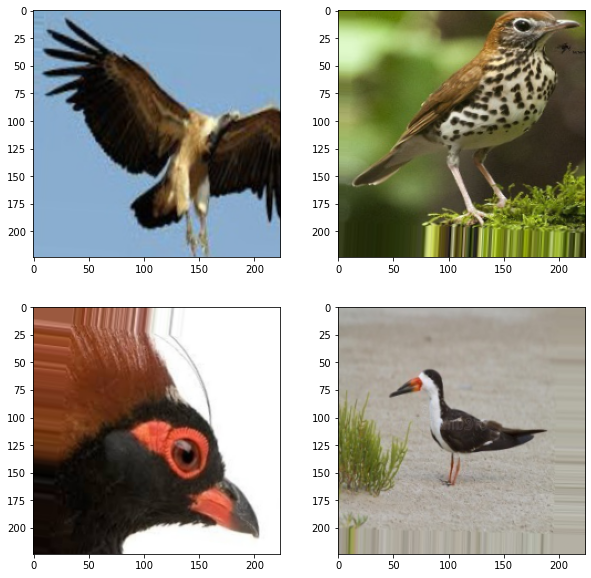

In [9]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 4
x, y = train.next()
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(image/255)
plt.show()

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, mode='min', verbose=1)

In [11]:

model.fit(train, steps_per_epoch=84635//32, validation_data=test, validation_steps=2625//32, epochs=20, callbacks=[early_stop, checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2644 steps, validate for 82 steps
Epoch 1/20
2643/2644 [============================>.] - ETA: 0s - loss: 2.0610 - accuracy: 0.5654
Epoch 00001: val_loss improved from inf to 1.31257, saving model to model_weights.h5
2644/2644 [==============================] - 737s 279ms/step - loss: 2.0606 - accuracy: 0.5655 - val_loss: 1.3126 - val_accuracy: 0.6867
Epoch 2/20
2643/2644 [============================>.] - ETA: 0s - loss: 1.2250 - accuracy: 0.7376
Epoch 00002: val_loss did not improve from 1.31257
2644/2644 [==============================] - 665s 251ms/step - loss: 1.2250 - accuracy: 0.7376 - val_loss: 1.3278 - val_accuracy: 0.7104
Epoch 3/20
2643/2644 [============================>.] - ETA: 0s - loss: 1.1308 - accuracy: 0.7681
Epoch 00003: val_loss improved from 1.31257 to 1.26951, saving model to model_weights.h5
2644/2644 [==============================] - 665s 251ms/step - loss: 1.1306 - accuracy: 0.7680 - val_loss: 1.2695

In [12]:
base_model.trainable = True

In [13]:
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(train, validation_data=test, epochs=10, steps_per_epoch=84635//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2644 steps, validate for 83 steps
Epoch 1/10
2644/2644 [==============================] - 670s 254ms/step - loss: 0.4936 - accuracy: 0.8795 - val_loss: 0.2088 - val_accuracy: 0.9379
Epoch 2/10
2644/2644 [==============================] - 666s 252ms/step - loss: 0.2775 - accuracy: 0.9228 - val_loss: 0.1770 - val_accuracy: 0.9482
Epoch 3/10
2644/2644 [==============================] - 666s 252ms/step - loss: 0.2070 - accuracy: 0.9412 - val_loss: 0.1411 - val_accuracy: 0.9539
Epoch 4/10
2644/2644 [==============================] - 667s 252ms/step - loss: 0.1615 - accuracy: 0.9524 - val_loss: 0.1354 - val_accuracy: 0.9581
Epoch 5/10
2644/2644 [==============================] - 667s 252ms/step - loss: 0.1285 - accuracy: 0.9613 - val_loss: 0.1259 - val_accuracy: 0.9600
Epoch 6/10
2644/2644 [==============================] - 667s 252ms/step - loss: 0.1076 - accuracy: 0.9671 - val_loss: 0.1652 - val_accuracy: 0.9478
Epoch 7/10
2644/26

In [14]:
model.save('ICGG_SLA_final2.h5')